# Tech Stocks Analysis midst COVID-19 crisis 

### Some information regarding the code and the analysis

The data for this project is drawn through the [Yahoo Finance!](https://finance.yahoo.com/) API. Our efforts will be focused towards the stocks' closing prices and their returns. We will be using three different datasets for our analysis:
* The first dataset is the period from December 31, 2019 to present. We choose this start date because this is when it was the first time the virus was greatly noticed in China. For more information see the timeline posted below. We use this dataset to see how the stocks react during the ongoing crisis.

* The second dataset is the whole year of 2019, up to December 31, 2019. We will use it for our risk assessment and for the computation of Value at Risk (VaR) where we will check whether an investor could be prepared and shield his portfolio for this recession.

* The third dataset is the whole time period from the beginning of 2019 to the present. It will be used for visualization purposes and to gain an insight of how has this crisis affected the stocks overall.

We'll be answering the following questions along the way:

    1) What was the change in price of the stocks over time?
    2) What was the daily return of the stocks on average?
    3) What was the moving average of the various stocks?
    4) What was the correlation between different stocks' closing prices?
    5) What was the correlation between different stocks' daily returns?
    6) How deep this recession actually is for a well-prepared investor?


**Notes:**
1. In case you download this notebook to use the code, you will have to install plotly and cufflings in order to see some of the visualizations. For the online viewing, a static image of a recent state will be posted and will be frequently updated.
2. The "end" date for our main dataset is set as datetime.now() meaning it will draw information up to the same day the cell is ran. This will be updated in the future when the COVID-19 effect start to fade-off the market.


### Timeline of COVID-19:
*(Last update 4/11/2020)*
##### Feel free to check the effect of these events on the interacting plots below (if they are available for you). List will be updated.
* Dec 31 - Chinese authorities treated dozens of cases of pneumonia of unknown cause.
* Jan 11 - China reported its first death.
* Jan 20 - Other countries, including the United States, confirmed cases.
* Jan 23 - Wuhan, a city of more than 11 million, was cut off by the Chinese authorities.
* Jan 30 - The W.H.O. declared a global health emergency.
* Jan 31 - The Trump administration restricted travel from China.
* Feb 02  - The first coronavirus death was reported outside China.
* Feb 14 - France announces the first coronavirus death in Europe.
* Feb 21 - The virus appears in Iran from an unknown source.
* Feb 23 - Italy sees major surge in coronavirus cases and officials lock down towns.
* Feb 24 - The Trump administration asks Congress for $1.25 billion for coronavirus response.
* Feb 26 - Latin America reports its first coronavirus case.
* Feb 28 - The number of infections in Europe spikes.
* Feb 29 - The United States records its first coronavirus death and announces travel restrictions.
* Mar 03 - U.S. officials approve widespread coronavirus testing.
* Mar 11 - President Trump blocks most visitors from continental Europe.
* Mar 13 - President Trump declares a national emergency.
* Mar 16 - Latin America begins to feel the affects of the virus.
* Mar 17 - France imposes a nationwide lockdown. The E.U. bars most travelers from outside the bloc for 30 days.
* Mar 19 - For the first time, China reports zero local infections.
* Mar 21 - Companies move to produce medical supplies.
* Mar 23 - Prime Minister Boris Johnson locks Britain down.
* Mar 24 - India, a country of 1.3 billion, announces a 21-day lockdown. The Tokyo Olympics delayed until 2021.
* Mar 27 - Trump signs coronavirus stimulus bill into law. UK Prime Minister Boris Johnson tests positive forthe virus.
* Mar 30 - More states in U.S. issue stay-at-home directives.
* Apr 02 - Global cases top 1 million, and millions loser their jobs.
* Apr 06 - Prime Minister Boris Johnson moved into intensive care.

*(Source: [A Timeline of the Coronavirus Pandemic](https://www.nytimes.com/article/coronavirus-timeline.html))*

### Let's start!

Starting with some imports:

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

C:\Users\giorg\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Run the cell below if you want to have the interactive plots. Keep in mind that you have to install the libraries at your command line/terminal using:

    pip install plotly
    pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

4.5.4


Let's use Yahoo and pandas to grab some data for our tech stocks.

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2019,12 ,31)

In [4]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

Getting a feel of our data.

In [5]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,84.000000,84.000000,84.000000,84.000000,8.400000e+01,84.000000
mean,1343.360926,1304.776328,1323.533393,1326.029403,2.255704e+06,1326.029403
std,133.723189,147.954413,141.302332,140.302534,9.191548e+05,140.302534
min,1071.319946,1013.536011,1056.510010,1056.619995,9.295000e+05,1056.619995
25%,1225.427460,1194.092468,1218.045013,1215.522552,1.564375e+06,1215.522552
50%,1364.065002,1326.077454,1344.705017,1341.434998,2.064900e+06,1341.434998
75%,1458.920013,1431.037537,1448.162445,1449.097473,2.664875e+06,1449.097473
max,1532.105957,1521.400024,1525.069946,1526.689941,4.252400e+06,1526.689941


In [6]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2019-12-31 to 2020-04-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       84 non-null     float64
 1   Low        84 non-null     float64
 2   Open       84 non-null     float64
 3   Close      84 non-null     float64
 4   Volume     84 non-null     int64  
 5   Adj Close  84 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.6 KB


Now we are setting a dataframe containing the Adjusted Closing Prices for our stocks. We use Adjusted Closing Prices instead of plain Closing Prices to accurately reflect the stocks' value after accounting for any corporate actions such as stock splits, dividends / distributions and rights offerings.

In [7]:
df_adj_close = DataReader(tech_list,'yahoo',start,end)["Adj Close"]
df_adj_close.head(10)

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-31,292.954712,1337.020020,157.270432,1847.839966
2020-01-02,299.638885,1367.369995,160.182480,1898.010010
2020-01-03,296.725769,1360.660034,158.187927,1874.969971
2020-01-06,299.090149,1394.209961,158.596817,1902.880005
2020-01-07,297.683533,1393.339966,157.150772,1906.859985
2020-01-08,302.472137,1404.319946,159.653915,1891.969971
2020-01-09,308.896912,1419.829956,161.648468,1901.050049
2020-01-10,309.595215,1429.729980,160.900513,1883.160034
2020-01-13,316.209534,1439.229980,162.835236,1891.300049


We also set a dataframe containing the volume of these stocks traded the last 3 months.

In [8]:
df_volume = DataReader(tech_list,'yahoo',start,end)["Volume"]
df_volume.head(10)

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-31,25201400.0,961800.0,18369400.0,2506500.0
2020-01-02,33870100.0,1406600.0,22622100.0,4029000.0
2020-01-03,36580700.0,1186400.0,21116200.0,3764400.0
2020-01-06,29596800.0,1732300.0,20813700.0,4061800.0
2020-01-07,27218000.0,1502700.0,21634100.0,4044900.0
2020-01-08,33019800.0,1528000.0,27746500.0,3508000.0
2020-01-09,42527100.0,1500900.0,21385000.0,3167300.0
2020-01-10,35161200.0,1820700.0,20725900.0,2853700.0
2020-01-13,30383000.0,1652300.0,21626500.0,2780800.0


#### Now that we've seen our DataFrames, let's go ahead and plot out the adjusted closing prices and volume of the stocks.

Run the cell only if you have successfully imported plotly and cufflings. Otherwise there is a static picture posted right after.

Let's first plot the closing prices:

    Feel free to play around with the plot. Use the menu on the top right corner to customize your interaction: 
         - Compare multi data on hover
         - Zoom in to see more details
         - Click on the legend lines to activate or deactivate the linegraphs.

In [9]:
# RUN ME ONLY IF YOU HAVE PLOTLY AND CUFFLINGS IMPORTED AND INSTALLED
adj_graph = df_adj_close.iplot(title='Adjusted Closing Price')

*Last Update: 5/01/2020*
![](Screenshots/Adj_Closing_Prices_plotly_.png)

From the graph we can see that there was a spike upwards at the end of January. It was the time when the W.H.O. declared a global health emergency and Trump administration restricted travel from China. Despite these facts the investors' attention was drawn towards the companies' reports. As Yahoo Finance! stated on that day:
> U.S. equities rebounded sharply late to end in the green on Thursday. Equities were largely boosted by a string of impressive earnings reports that streamed in and helped investors finally look beyond their fears over the Coronavirus outbreak. Earnings reports from major blue-chip companies such as Microsoft Corporation MSFT and The Coca-Cola Company KO propelled benchmark indices on Jan 30.

On February 21 a new decline was initiated. It was when the virus got the first reports in Iran too as as Yahoo Finance! stated:
> Benchmarks ended lower on Thursday, as investors nervously moved through equities amid heightened fears over the rising Coronavirus cases. Investors kept close tabs on the economic impact of the pandemic on global financial markets.
Coronavirus Makes its Presence Felt Globally

It is obvious that tech giants suffered that day. A major reason behind the benchmark indexes’ fall was technology companies’ have high exposure to Chinese and South Korean manufacturing, which then suffered because of the pandemic.

Now the Volume. The same as before applies regarding the availability and interaction.

In [10]:
# RUN ME ONLY IF YOU HAVE PLOTLY AND CUFFLINGS IMPORTED AND INSTALLED
df_volume.iplot(title='Volume')

*Last Update: 4/11/2020*
![](Screenshots/Volume_plotly_.png)

It is obvious in the graph that uncertainty have hit Apple and Microsoft much more than Amazon and Google. This is a first indicator that we should keep in mind for our further analysis. These ups and downs will probably affect their returns  and definitely skyrocket their volatility.   

Since we are dealing with spikey data it would be helpful to plot the Moving Averages of each stock so we get a better sense of the company's situation. A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random short-term price fluctuations. This way, we will get a better understanding of the trend each stock follows.

For more information on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [11]:
# Creating a list containing our dataframes to easily iterate through them
tickers = [AAPL,GOOG,MSFT,AMZN] 

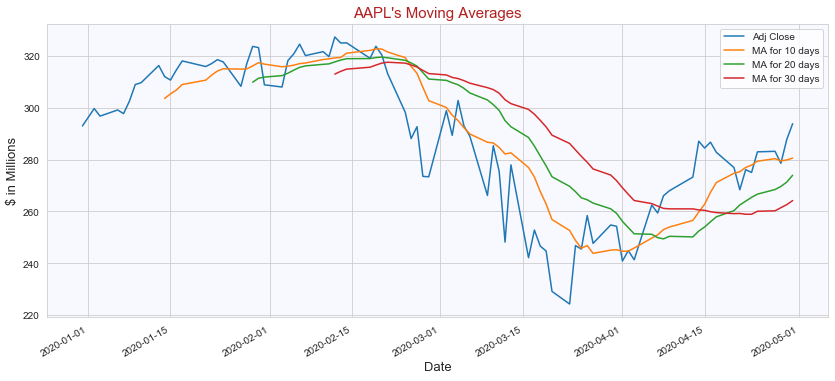

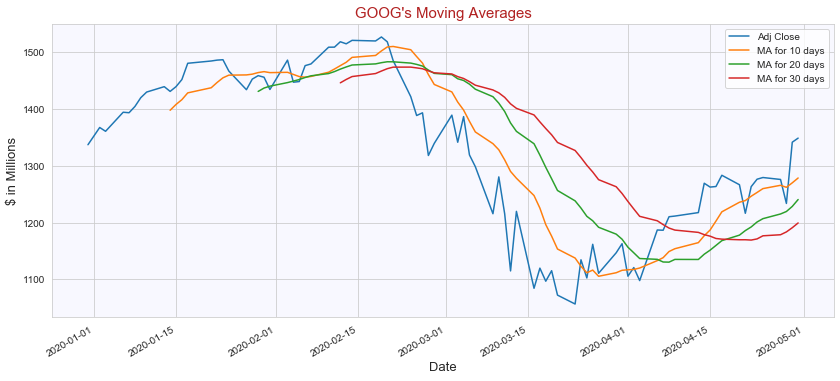

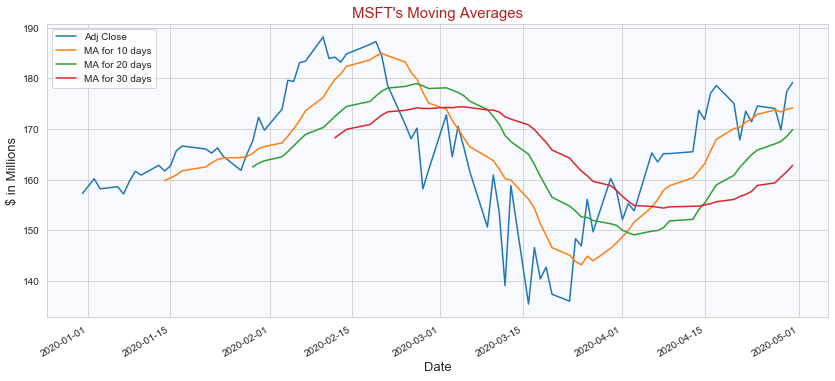

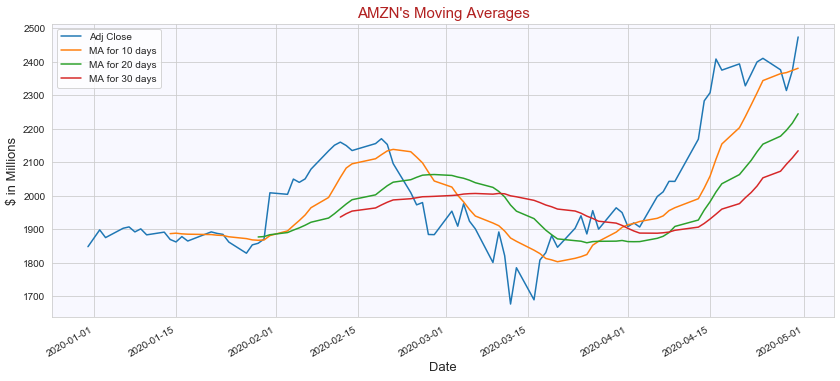

In [12]:
# Calculating and plotting moving averages
ma_day = [10,20,30]
for i in range(len(tickers)):
    for ma in ma_day:
        column_name = f'MA for {ma} days'  

        tickers[i][column_name] = tickers[i]['Adj Close'].rolling(ma).mean()
    ax = tickers[i][['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days']].plot(subplots=False,figsize=(14,6))
    ax.set_ylabel('$ in Millions', fontsize=13)
    ax.set_xlabel('Date', fontsize=13)
    ax.set_title(f"{tech_list[i]}'s Moving Averages",size=15,color='firebrick')
    ax.set_facecolor('ghostwhite')

These graphs are doing a great job capturing the big picture indeed. The trend of the lines produced by the Moving Averages along with their steepness are great indicators of the situation the companies have been experiencing the last 3 months. 

    As expected, threre is a downward trend for all of them but the slope varies. Once again, Apple and Google seem to have taken the most damage and have a steady decline. 

    Microsoft seems to have a rather weird reaction. The line indicates an increase in the beginning which continues for a modest period of time, and then drops more intensely that the other stocks.  

    Amazon seems to have by far the best reaction to this whole volatility. Even though its trend is downwards, the curve is the most flattened.  

#### Now we shift our focus to the daily returns of the stocks.


In [13]:
# Creating an extra column for each dataframe containing the daily returns
for i in tickers:
    i["Daily return"]=i["Adj Close"].pct_change()

In [14]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 30 days,Daily return
Date,,,,,,,,,,
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400.0,292.954712,NaN,NaN,NaN,NaN
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,299.638885,NaN,NaN,NaN,0.022816
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769,NaN,NaN,NaN,-0.009722
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149,NaN,NaN,NaN,0.007968
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533,NaN,NaN,NaN,-0.004703


To get a general idea of the daily returns we plot the returns distribution for Apple, Google, Microsoft and Amazon repsectively. 

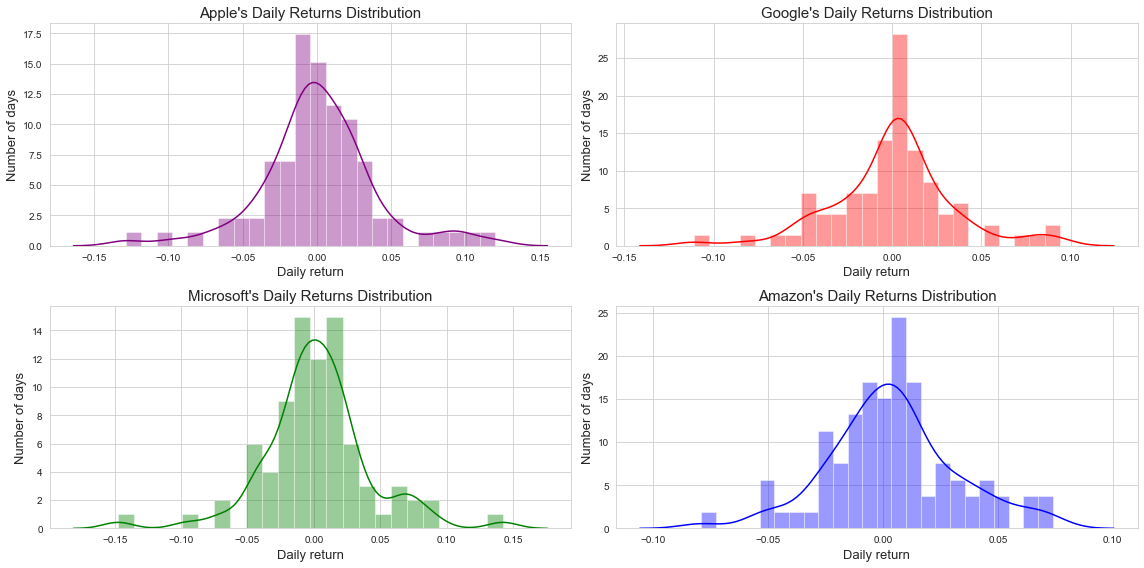

In [15]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(16,8))
aapl_hist = sns.distplot(AAPL["Daily return"].dropna(), bins=24,color='purple',ax=axs[0,0])
aapl_hist.set_title("Apple's Daily Returns Distribution", fontsize=15)
aapl_hist.set_ylabel("Number of days", fontsize=13)
aapl_hist.set_xlabel('Daily return', fontsize=13)


goog_hist =sns.distplot(GOOG["Daily return"].dropna(), bins=24,color='red',ax=axs[0,1])
goog_hist.set_title("Google's Daily Returns Distribution", fontsize=15)
goog_hist.set_ylabel("Number of days", fontsize=13)
goog_hist.set_xlabel('Daily return', fontsize=13)

msft_hist =sns.distplot(MSFT["Daily return"].dropna(), bins=24,color='green',ax=axs[1,0])
msft_hist.set_title("Microsoft's Daily Returns Distribution",fontsize=15)
msft_hist.set_ylabel("Number of days", fontsize=13)
msft_hist.set_xlabel('Daily return', fontsize=13)


amzn_hist =sns.distplot(AMZN["Daily return"].dropna(), bins=24,color='blue',ax=axs[1,1])
amzn_hist.set_title("Amazon's Daily Returns Distribution", fontsize=15)
amzn_hist.set_ylabel("Number of days", fontsize=13)
amzn_hist.set_xlabel('Daily return', fontsize=13)

plt.tight_layout()

The mean daily return is around zero, as it was expected. Furthermore, the information we draw seems to be inline with the results we had for the adjusted closing prices. 

Apple and Microsoft exhibit "fat tails", meaning there is a number of occurrences that deviate from the mean or "normal" behavior of the stock. The fact that these extreme occurrences are equally present on the right and left side of the mean shows the great variation and uncertainty that the market has been experiencing the last few months. 

It is worth mentioned that Apple and Microsoft gave the biggest spread with the latter one having returns varying from -0.15 to +0.15 (approximately). Meanwhile Google has a smaller number of extreme values and less variance than Apple and Microsoft but still, it is obviously volatile.

Once again, the stock which looks to maintain its power is Amazon. Amazon has the less variance compared to the rest of the "big four" with returns taking prices from -0.05 to +0.07 with most of the extreme occurencies being on the positive side of returns!

##### Now that we have a general sense of how the stocks performed, it would be wise to plot a linegraph containing all this information, which will shade more light on our case and help us understand the situation on a deeper level.

First we create a DataFrame with the returns of each stock.

In [16]:
# Creating the returns DataFrame.

tech_returns = df_adj_close.pct_change()
tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-02,0.022816,0.022700,0.018516,0.027151
2020-01-03,-0.009722,-0.004907,-0.012452,-0.012139
2020-01-06,0.007968,0.024657,0.002585,0.014886
2020-01-07,-0.004703,-0.000624,-0.009118,0.002092


In [17]:
# RUN THIS CELL ONLY IF YOU HAVE PLOTLY AND CUFFLINGS IMPORTED AND INSTALLED

tech_returns.iplot(title = "Stocks' Returns")

*Last Update: 4/11/2020*
![Returns_plotly.png](Screenshots/Returns_plotly.png)

This graph provides the most interesting insight in the project so far. That is because it exhibits the behavioral nature of the stock market. Exploring the graph from left to right, it is obvious that returns are correlated to a certain extend. That is until February 23-24. From that point and until March 18, the stocks' returns are almost perfectly correlated. This does not hold for two short periods of time which were the weekends that stock exchanges did not operate and any decision regarding the corona virus was taken.

If we break down what happened during this timeframe of "perfect correlation" we will notice that there is a series of big, mostly distressing announcements. Going back to our COVID-19 timeline we specifically see that during this period:

1. Italy sees major surge in coronavirus cases and officials lock down towns.
2. The Trump administration asks Congress for $1.25 billion for coronavirus response.
3. The number of infections in Europe spikes.
4. The United States records its first coronavirus death and announces travel restrictions.
5. U.S. officials approve widespread coronavirus testing.
6. President Trump blocks most visitors from continental Europe.
8. President Trump declares a national emergency.
9. Latin America begins to feel the affects of the virus.
10. France imposes a nationwide lockdown. The E.U. bars most travelers from outside the bloc for 30 days.

On March 12 the Fed announced its decision to Pump $1.5 Trillion into financial markets, hence the great rally, only for president Trump to declare a national emergency the next day, which -combined with the rest of the negative news- resulted into that huge drop.

It is obvious that during these days, investors' trading activity relied heavily on their emotions either of fear or hope, but mainly fear. The vast majority did not hold their composure and rational as to how these announcements will affect each of these companies in the long run, which may be in the same industry but revenue from different kind of operations. They just reacted. It is times like these that make the market totally unpredictable and months of stock analysis and research based on fundamentals go out the window.  

#### Since we keep referring to the correlation between the price and the returns of these stocks, it would make sense to go a step further and visualize it.

We chose to do this through paiplots, which have the ability to present the correlation between any combination of variables in our dataset.

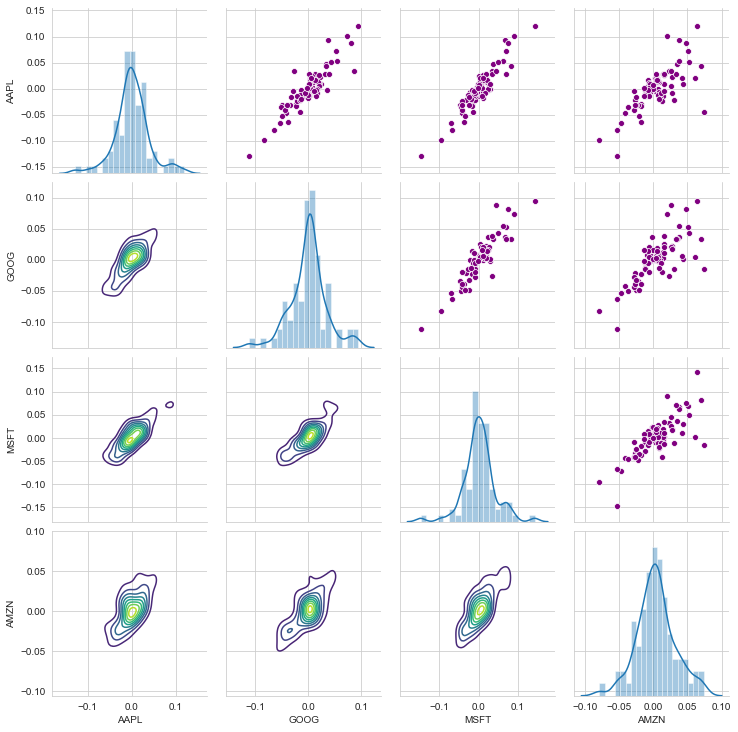

In [18]:
# Creating the returns pairplot

returns_fig = sns.PairGrid(tech_returns.dropna())
pal={"AAPL":'r',"GOOG":'b'}
returns_fig.map_upper(sns.scatterplot,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='viridis',shade_lowest=False) #shade=True
returns_fig.map_diag(sns.distplot,bins=20)

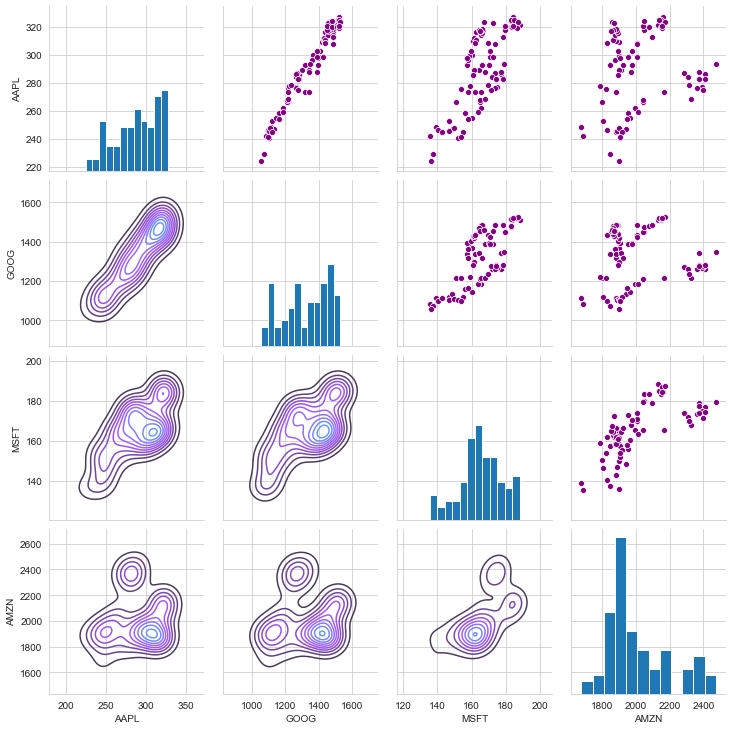

In [19]:
# Creating the Adjusted Closing Prices pairplot

closings_fig = sns.PairGrid(df_adj_close.dropna(),palette=pal)

closings_fig.map_upper(sns.scatterplot,color='purple')
closings_fig.map_lower(sns.kdeplot,cmap='cool_d')
closings_fig.map_diag(plt.hist,bins=12)

There are two immediate observations we can make from these scatter and density plots:
1. Google and Apple are almost perfectly correlated
2. Google and Apple are also greatly correlated with Microsoft
3. Amazon has the least correlation by far with the rest of the three.

To drive our point home, we will quantify these correlation in two different boards, one for the returns and for the stocks' price:

Text(610.9818181818181, 0.5, '')

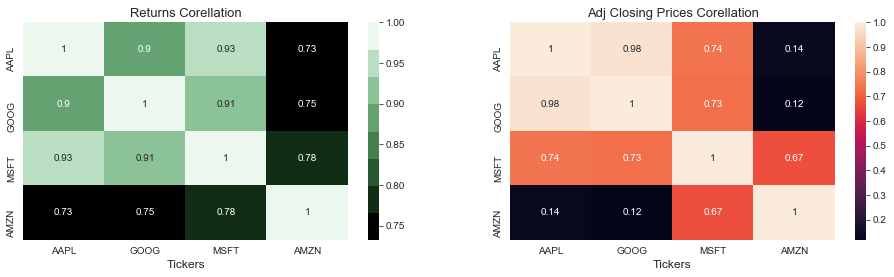

In [20]:
# Creating two correlation heatmaps for returns and stocks' price respectively

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(16,4))
ret_heatmap = sns.heatmap(tech_returns.dropna().corr(),
                            cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True),
                            annot=True,ax=axs[0])
ret_heatmap.set_title('Returns Corellation', fontsize=13)
ret_heatmap.set_xlabel('Tickers', fontsize=12)
ret_heatmap.set_ylabel('', fontsize=12)

adj_clos_heatmap = sns.heatmap(df_adj_close.dropna().corr(),annot=True,ax=axs[1])
adj_clos_heatmap.set_title('Adj Closing Prices Corellation', fontsize=13)
adj_clos_heatmap.set_xlabel('Tickers', fontsize=12)
adj_clos_heatmap.set_ylabel('', fontsize=12)

By now, we should have a clear picture regarding the reaction of the "big four" to corona virus crisis. There is, though, one more step we can take to proof-shield our analysis. 

So far we have been working with data generated from the last 3 months. It would be nice if we could put our analysis into a greater perspective. To do this we will take into consideration what was happening in the market before the outbreak of the pandemic. Thus, we will get a clear picture of the effect of the current recession on the tech industry.

Furthermore, we will be able to run a hypothetical scenario and see whether a well-prepared investor would be ready for such a downturn. This will tackle one of the medias' favorite claim: That this recession is as bad as the one occurred in 2008. 

Let's put the data into work and draw our final conclusions.

### Risk Asessment

First we will gather the necessary data

In [21]:
# Data for the year preceding COVID-19

tech_list = ['AAPL','GOOG','MSFT','AMZN']
end_bc = datetime(2019,12 ,31)
start_bc = datetime(2018,12 ,31)

df_adj_close_bc = DataReader(tech_list,'yahoo',start_bc,end_bc)["Adj Close"]

In [22]:
# Getting the returns and cleaning the DataFrame

bc_tech_returns = df_adj_close_bc.pct_change()
clean_bc_rets = bc_tech_returns.dropna()

clean_bc_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-02,0.001141,0.009888,-0.004430,0.024741
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242
2019-01-04,0.042689,0.053786,0.046509,0.050064
2019-01-07,-0.002226,-0.002167,0.001275,0.034353
2019-01-08,0.019063,0.007385,0.007251,0.016612


In [23]:
# Data for the whole period

tech_list = ['AAPL','GOOG','MSFT','AMZN']
end_at = datetime.now()
start_at = datetime(2018,12 ,31)

df_adj_close_at = DataReader(tech_list,'yahoo',start_at,end_at)["Adj Close"]

In [24]:
# Getting the returns and cleaning the DataFrame

at_tech_returns = df_adj_close_at.pct_change()
clean_at_rets = at_tech_returns.dropna()

clean_at_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-02,0.001141,0.009888,-0.004430,0.024741
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242
2019-01-04,0.042689,0.053786,0.046509,0.050064
2019-01-07,-0.002226,-0.002167,0.001275,0.034353
2019-01-08,0.019063,0.007385,0.007251,0.016612


We continue with plotting our findings

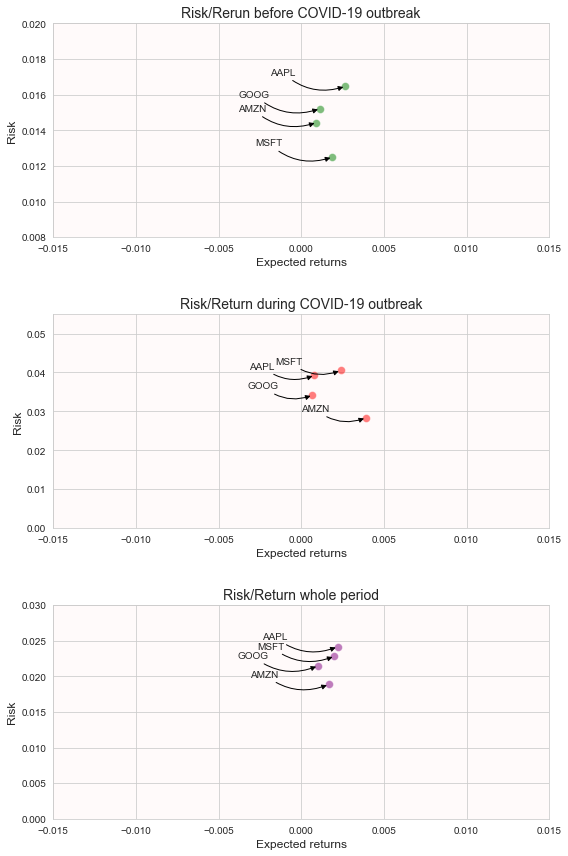

In [25]:
# Plotting the Risk (standard deviation) against the Expected return (mean) of the stocks

fig, axs = plt.subplots(nrows=3,ncols=1, figsize=(8,12))
area = np.pi*20
                                            # Risk during COVID-19

#Using my "default" data
rets = tech_returns.dropna()

risk_dc = sns.scatterplot(rets.mean(), rets.std(),alpha = 0.5,s =area,facecolor='red',ax=axs[1])

# Set the x and y limits of the plot
risk_dc.set_ylim([0.000,0.055])
risk_dc.set_xlim([-0.015,0.015])
risk_dc.set_facecolor('snow')

#Set the plot axis titles
risk_dc.set_title('Risk/Return during COVID-19 outbreak',fontsize=14)
risk_dc.set_xlabel('Expected returns',fontsize=12)
risk_dc.set_ylabel('Risk',fontsize=12)

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    risk_dc.annotate(
        label, 
        xy = (x, y), xytext = (-65, 10),
        textcoords = 'offset points', ha = 'left', va = 'center_baseline',
        arrowprops = dict(arrowstyle = '-|>', color='black', connectionstyle = ' arc3, rad= 0.3'))
    
    
                                            # Risk before COVID-19

risk_bc = sns.scatterplot(clean_bc_rets.mean(), clean_bc_rets.std(),alpha = 0.5,s =area,color='green',ax=axs[0])

# Set the x and y limits of the plot
risk_bc.set_ylim([0.008,0.020])
risk_bc.set_xlim([-0.015,0.015])


#Set the plot axis titles
risk_bc.set_title('Risk/Rerun before COVID-19 outbreak',fontsize=14)
risk_bc.set_xlabel("Expected returns",fontsize=12)
risk_bc.set_ylabel('Risk',fontsize=12)
risk_bc.set_facecolor('snow')

# Label the scatter plots
for label, x, y in zip(clean_bc_rets.columns, clean_bc_rets.mean(), clean_bc_rets.std()):
    risk_bc.annotate(
        label, 
        xy = (x, y), xytext = (-50, 15),
        textcoords = 'offset points', ha = 'right', va = 'center_baseline',
        arrowprops = dict(arrowstyle = '-|>', color='black', connectionstyle = 'arc3, rad= .3'))
    

                                            #Risk the whole period



risk_at = sns.scatterplot(clean_at_rets.mean(), clean_at_rets.std(),alpha = 0.5,s =area,color='purple',ax=axs[2])

# Set the x and y limits of the plot
risk_at.set_ylim([0.0,0.030])
risk_at.set_xlim([-0.015,0.015])

#Set the plot axis titles
risk_at.set_title('Risk/Return whole period',fontsize=14)
risk_at.set_xlabel('Expected returns',fontsize=12)
risk_at.set_ylabel('Risk',fontsize=12)
risk_at.set_facecolor('snow')

# Label the scatter plots
for label, x, y in zip(clean_at_rets.columns, clean_at_rets.mean(), clean_at_rets.std()):
    risk_at.annotate(
        label,
        xy = (x, y), xytext = (-50, 10),
        textcoords = 'offset points', ha = 'right', va = 'center',
        arrowprops = dict(arrowstyle = '-|>', color='black', connectionstyle = 'arc3, rad= .3'))

        
plt.tight_layout(h_pad=3)

As a general rule we prefer having stocks with high expected returns and low risk. Most of the times there is a trade-off between the two and investor has to choose between having larger exprected returns but also bearing higher risk or moderate expected returns but lower risk. 

Keeping that in mind, considering we did our analysis based on data from 2019, in the beginning of 2020 Microsoft's stock seems to be the ideal purchase since it has large expected return and the lowest risk. Apple seems to have the largest expected return but it also has the highest risk, driving us back to the trade-off we mentioned. Amazon's low returns but moderate risk would keep us away from buying the stock, since we have better and much cheaper alternatives.

Moving to the period during COVID-19 we are witnessing a totally different situation. Microsoft's expected returns have shrunk and its volatility -which we have already captured in our prior analysis- have skyrocketed its risk. In fact it is now the most risky stock compared to the rest! Apple's and Google's expected returns have gone to the negative side, showing once again that these were the two stocks that got hit the hardest. Amazon managed to maintain positive expected returns and the lowest risk, validating our prior conclusion that it is the best performing stock in the midst of this economic downturn.

Using data from last year and the current crisis we get a new ranking. Microsoft and Apple still have the larger expected returns but also bear the highest riskiness. Google's expected returns have shrunk almost to zero and Amazon balances well between these two factors. This kind of behavior is a key take-away and it is something that we should keep in mind in case we are considering constructing a portfolio since it can largely affect our stock picking process, forcing us to use other metrics instead of the standard high expected return/low risk rule.

### Let's run a hypothetical scenario

We are determined to get into the stock-market game. It's our 2020 resolution. But knowing the market is notorious for crashing and destroying peoples’ lives we want to take any precaution possible. Hence, we decide calculating the Value at Risk or VaR. We can treat VaR as the amount of money we could have expected to lose (aka putting at risk) for a given confidence interval. In other words, with X percent of certainty, what is the largest amount we can lose trading a specific stock.

This can be done through various methods. We will use the **Monte Carlo Simulation** to compute our VaR. Using the Monte Carlo to run many trials with random market conditions, we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

A brief description of the Monte Carlo method:
> We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated, and the next price movement is "conditionally independent" of past price movements.

>This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock. 

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables. We'll be using the Apple DataFrame AAPL. 

There are two reasons we choose Apple. 
1. We want to test the current belief that COVID-19 has caused a crisis as bad as the one we had in 2008 and see if that applies to the "big four". 
2. We have concluded that it is the stock that was affected and underperformed the most out of the four. 

So we are basically checking the worst of the worst case scenario: Buying the Apple stock right before the COVID-19 outbreak. Then we will determine if a VaR analysis would have adequately prepared us even for that scenario.

In [26]:
#Value at Risk using Monte Carlo Method

# Setting time frame. 253 trading days in a year
days = 253

# Delta
dt=1/253

# Setting the drift
mu = clean_bc_rets["AAPL"].mean()

# Setting the volatility sigma
sigma = clean_bc_rets["AAPL"].std()

# Creating a function for Monte Carlo simulation
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

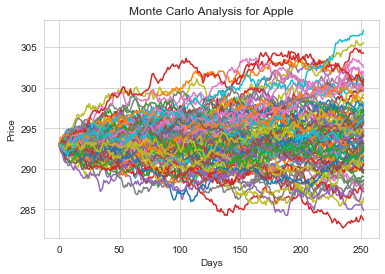

In [27]:
# Getting Apple' start price
start_price = AAPL.iloc[0,5]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

This is how a Monte Carlo simulation looks like. We have our starting prices and then based on the expected return and volatility of the stock, we keep "injecting" a positive or negative shock to the price which drives up or down. Doing this returns a range of prices that we could end up having.

Now we will follow the same procedure but with a larger number of simulations to aggregate and compute our VaR.

In [28]:
# Doing a larger run and plotting it in a histogram

# Setting the number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Plotting our final results.

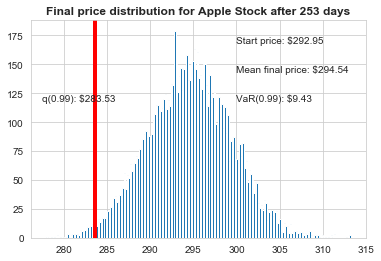

In [29]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    

plt.hist(simulations,bins=200)
# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');

Using drift and volatility based on stock prices of 2018-2019 and setting as start price the price
at 2019-12-31 we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Apple stock, which looks to be $9.59 for every investment of 293.67 (the price of one inital Apple stock).

This basically means for every initial stock you purchase your putting about $9.59 at risk 99% of the time from our Monte Carlo Simulation.

But we want the 3-month VaR which is the time passed since we bought the AAPL stock. We can do this by multiplying the one-day VaR with the square root of the days we want to calculate the VaR for.

In [32]:
# Calculating the 3-month VaR
9.43 * (63**(1/2))

74.84830459001726

The result suggests that in worst case scenario we would have lost 73 dollars of worth. Hence, we would shield our portfolio and be prepared for a loss of this magnitude.

Now let's calculate what is our actual loss. That is the difference between the price of the stock when we bought it minus the current value of the stock, after it was hit by the recession.

In [31]:
#Our current loss
print(AAPL.iloc[0,5]- AAPL.iloc[-1,5])

-0.84527587890625


Our current loss is less than a dollar! The worst case was around 4/11/2020 when our loss was 25 dollars. That is almost 50 dollars below our danger threshold. So, in theory, a precautious investor who did a basic risk analysis would be adequately prepared for the crisis we are currently experiencing!

That doesn't mean that the current economic downturn is not a significant one, since other industries -like tourism- have been greatly impacted. But it is a clue that regarding the "big four" the situation has not exploded out of proportion yet. Whether this can be generalized to the whole tech industry is a claim that can be a subject of an interesting debate.

I hope you found this analysis fun and insightful.

### Thank you!